# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Aizar Hafizh Soejadi
- **Email:** aizarhafizh@gmail.com
- **ID Dicoding:** aizarhafizh

## Menentukan Pertanyaan

- Pada hari dan jam apa yang dapat dikategorikan sebagai hari/jam sibuk?
- Apa pengaruh cuaca terhadap penggunaan rental sepeda?
- Apa pengaruh hari libur terhadap penggunaan rental sepeda?

## Import Semua Packages/Library yang Digunakan

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [33]:
# Load bike data for each day
day_bike_df = pd.read_csv("data/day.csv")
day_bike_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [34]:
# Load bike data for each hour everyday
hour_bike_df = pd.read_csv("data/hour.csv")
hour_bike_df	

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight dari gathering data:**
- Kedua data memiliki kolom yang hampir sama. Perbedaannya terletak pada kolom ***hr*** yang menunjukkan jam pada hari tersebut pada data *hour.csv*
- Jumlah baris yang dimiliki kedua dataset berbeda jauh dikarenakan *day.csv* (731 baris) merupakan data **rental sepeda setiap harinya**, sedangkan *hour.csv* (17.379 baris) merupakan data **rental sepeda setiap jam pada setiap harinya**
- Karena kedua data memiliki data yang sama persis, hanya berbeda di detail data (jam), maka **akan dipakai data dari hour.csv saja**. Data per hari bisa didapatkan melalui grouping data dari hour.csv berdasarkan kolom dteday

### Assessing Data

#### Penilaian data *hour_bike_df*

In [35]:
# Checking info keseluruhan
hour_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [36]:
# Checking missing valies
hour_bike_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [37]:
# Check data duplikat
hour_bike_df.duplicated().sum()

0

In [38]:
# Melihat deskripsi statistik keseluruhan
hour_bike_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Hasil assessment hour_bike_df:**
- Tidak ada missing values
- Tidak ada data yang duplikat
- Ada ketidaksesuaian tipe data pada kolom *dteday* yang berupa object, seharusnya datetime

**Insight:**
- Dataset sudah memiliki value yang lengkap dan nilai-nilai yang akurat dan masuk akal, hanya terdapat 1 buah keliru pada tipe data
- Namun, dataset ini juga memiliki value yang kurang deskriptif ketika dibaca atau divisualisasikan nantinya (contoh: hari dalam angka 0-6, bulan 1-12)

### Cleaning Data

#### Pengubahan tipe data *dteday*

In [39]:
# Mengubah ke datetime untuk hour_bike_df
hour_bike_df["dteday"] = pd.to_datetime(hour_bike_df["dteday"])

#### Pengubahan nama kolom

Hal ini dilakukan agar dataframe dapat lebih mudah dibaca

In [40]:
# Untuk data hour_bike_df
hour_bike_df.rename(columns = {"dteday":"date_day", "yr":"year", "mnth":"month", "hr":"hour", "casual":"casual_user", "registered":"registered_user","cnt":"total_user"}, inplace=True)
hour_bike_df.head()

,instant,date_day,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [41]:
# Drop kolom instant
hour_bike_df.drop("instant", axis=1, inplace=True)

Dropping kolom instant dilakukan karena kolom instant merupakan indexing dari tiap baris dan tidak menggambarkan nilai apapun yang memiliki makna.

In [42]:
# Hasil akhir setelah cleaning
hour_bike_df.head()

,date_day,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual_user,registered_user,total_user
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Tidak banyak cleaning yang dilakukan pada dataset ini, hanya pengubahan tipe data
- Cleaning yang dilakukan berupa penyesuaian kolom
- Penyesuaian juga dilakukan untuk memudahkan dalam proses EDA dan visualisasi data pada tahap selanjutnya

## Exploratory Data Analysis (EDA)

### Explore Jumlah Pengguna per Hari

In [43]:
# Grouping berdasarkan jenis hari (workingday) dan jam
grouped_weekday = hour_bike_df.groupby(by="weekday").agg({
	"casual_user": "median",
	"registered_user": "median",
	"total_user": "median"
}).reset_index()

grouped_weekday

,weekday,casual_user,registered_user,total_user
0,0,24.0,89.0,116.0
1,1,15.0,112.0,139.0
2,2,13.0,121.0,147.0
3,3,12.0,122.0,143.0
4,4,14.0,130.0,154.0
5,5,17.0,136.0,165.0
6,6,25.0,100.5,129.0


- **Hari Jumat dapat dianggap sebagai hari sibuk** karena memiliki **median total_user tertinggi**. Median dijadikan pertimbangan dibandingkan karena sum antara hari satu dengan yang lain tidak berbeda jauh, selain itu ada kemungkinan jumlah user melonjak pada tanggal tertentu sehingga sum tidak dijadikan pertimbangan untuk menentukan hari sibuk.
- Selain itu, casual_user cenderung menyewa sepeda pada akhir pekan, terlihat dari median casual_user yang tinggi pada hari Sabtu dan Minggu

### Explore Hubungan antara Jumlah Pengguna, Jam, dan Hari

In [44]:
# Grouping berdasarkan jam
grouped_hour = hour_bike_df.groupby(by= "hour").agg({
	"casual_user": "sum",
	"registered_user": "sum",
	"total_user": "sum"
}).sort_values(by="total_user", ascending=False)

grouped_hour

,casual_user,registered_user,total_user
hour,,,
17,54220,282640,336860
18,44496,265276,309772
8,15761,245240,261001
16,53834,173914,227748
19,35505,191284,226789
13,52713,132206,184919
12,49718,134696,184414
15,54606,128543,183149
14,55089,120563,175652


Jam paling sibuk di mana banyak pengguna menyewa sepeda adalah pada jam 17.00-18.00 dan juga jam 8.00 pagi yang mana kemungkinan bersesuaian dengan jam pulang kerja dan jam berangkat kerja.

### Explore hubungan antara jumlah pengguna dan kondisi cuaca

In [45]:
# Grouping berdasarkan cuaca
grouped_weather = hour_bike_df.groupby(by= "weathersit").agg({
	"casual_user": "sum",
	"registered_user": "sum",
	"total_user": "sum"
}).sort_values(by="total_user", ascending=False).reset_index()

grouped_weather

,weathersit,casual_user,registered_user,total_user
0,1,462745,1875428,2338173
1,2,134481,661471,795952
2,3,22783,135548,158331
3,4,8,215,223


Lebih banyak penyewa pada cuaca cerah (1) dan berawan (2) dibandingkan pada cuaca hujan (3) ataupun hujan deras (4)

### Explore Hubungan antara jumlah pengguna dan hari libur

In [46]:
# Grouping berdasarkan hari libur
grouped_holiday = hour_bike_df.groupby(by= "holiday").agg({
	"casual_user": "sum",
	"registered_user": "sum",
	"total_user": "sum"
}).sort_values(by="total_user", ascending=False).reset_index()

grouped_holiday

,holiday,casual_user,registered_user,total_user
0,0,597658,2616586,3214244
1,1,22359,56076,78435


Tentu saja, lebih sedikit orang yang menyewa sepeda di hari libur dibandingkan di hari biasa/hari kerja.

**Insight:**
- Penyewaan sepeda paling ramai di jam-jam pergi kerja, 7.00-8.00 pagi dan jam pulang kerja, 17.00-18.00 sore
- Hari sibuk bisa terjadi di hari Jumat (based on median) atau Kamis (based on mean) 
- Cuaca berpengaruh pada jumlah penyewa, semakin cerah cuacanya, semakin banyak orang menyewa sepeda
- Pada hari libur semakin sedikit orang yang akan menyewa sepeda

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada hari dan jam apa yang dapat dikategorikan sebagai hari/jam sibuk?

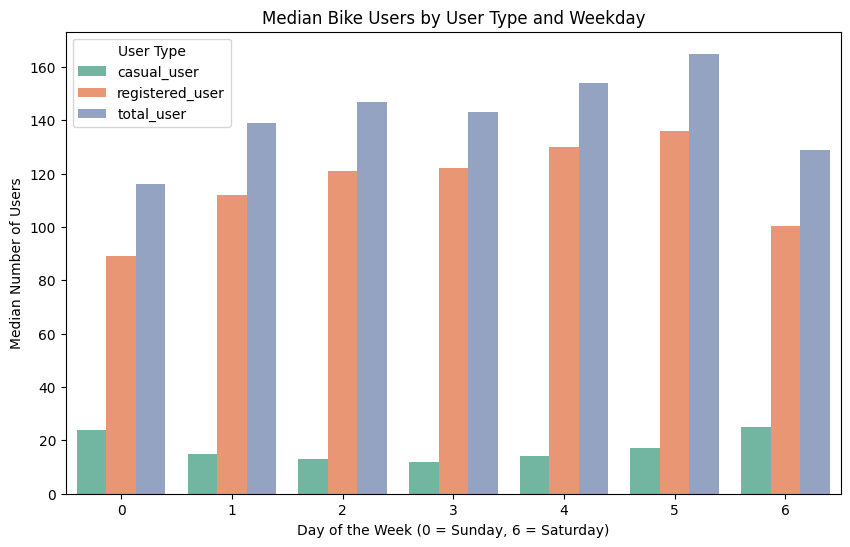

In [47]:
# Melt the dataframe to get it into long format for Seaborn
grouped_melted = pd.melt(grouped_weekday, id_vars="weekday", value_vars=["casual_user", "registered_user", "total_user"], 
                         var_name="user_type", value_name="median_value")

# Create a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x="weekday", y="median_value", hue="user_type", data=grouped_melted, palette="Set2")

# Set plot titles and labels
plt.title('Median Bike Users by User Type and Weekday')
plt.xlabel('Day of the Week (0 = Sunday, 6 = Saturday)')
plt.ylabel('Median Number of Users')
plt.legend(title="User Type")

# Display the plot
plt.show()

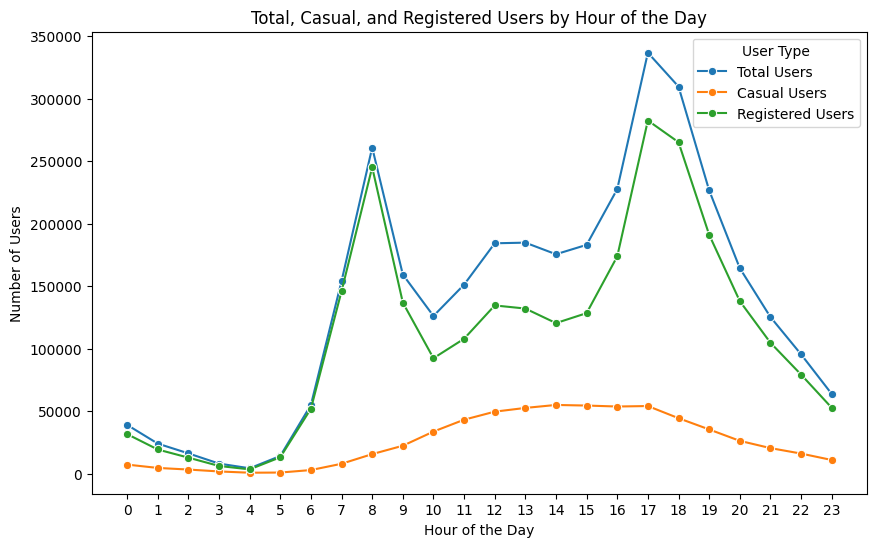

In [48]:
# Plot the total, casual, and registered users as line plots
plt.figure(figsize=(10, 6))

# Plot total users
sns.lineplot(x='hour', y='total_user', data=grouped_hour, label='Total Users', marker='o')

# Plot casual users
sns.lineplot(x='hour', y='casual_user', data=grouped_hour, label='Casual Users', marker='o')

# Plot registered users
sns.lineplot(x='hour', y='registered_user', data=grouped_hour, label='Registered Users', marker='o')

# Set plot titles and labels
plt.title('Total, Casual, and Registered Users by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Users')
plt.xticks(range(0, 24))  # Ensure x-axis ticks are for every hour (0 to 23)
plt.legend(title="User Type")

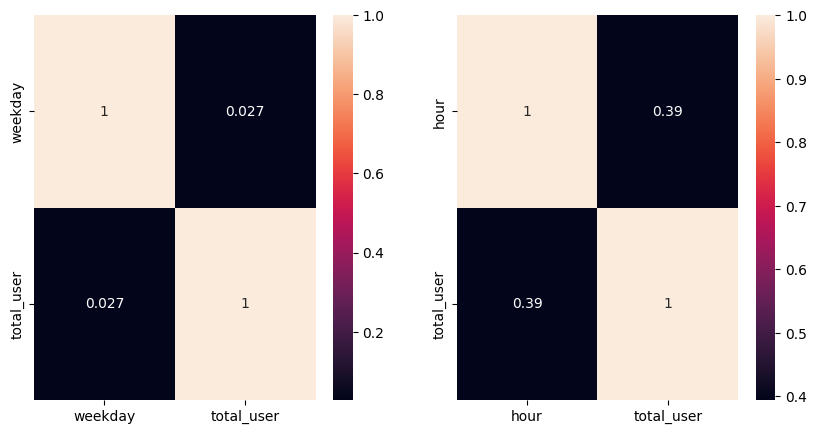

In [49]:
# Melihat korelasi antara total_user dengan weekday dan hour
fig, ax =plt.subplots(1,2, figsize=(10,5))

sns.heatmap(hour_bike_df[["weekday", "total_user"]].corr(numeric_only=True), annot=True, ax=ax[0])
sns.heatmap(hour_bike_df[["hour", "total_user"]].corr(numeric_only=True), annot=True, ax=ax[1])

plt.show()

Terdapat korelasi postif antara jam dan jumlah penyewa sepeda sebesar 0.39. Sementara, korelasi antara jumlah total penyewa dan hari hanya 0.027 yang mana tidak signifikan. Artinya, jam/waktu lebih berpengaruh pada penyewaan sepeda daripada hari.

### Pertanyaan 2: Apa pengaruh cuaca terhadap penggunaan rental sepeda?

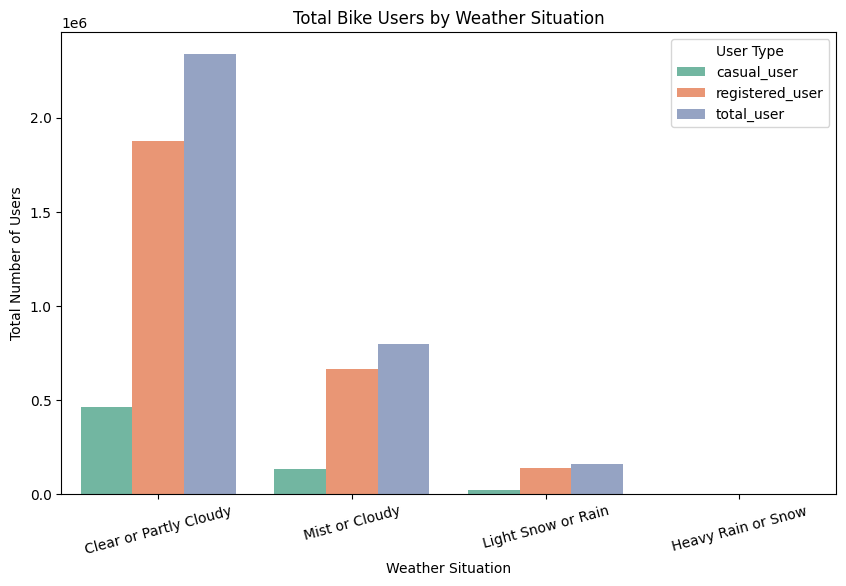

In [50]:
# Mapping weather situation to descriptive names
weather_mapping = {
    1: 'Clear or Partly Cloudy',
    2: 'Mist or Cloudy',
    3: 'Light Snow or Rain',
    4: 'Heavy Rain or Snow'
}
grouped_weather['weather_description'] = grouped_weather['weathersit'].map(weather_mapping)

# Melt the dataframe to long format for Seaborn plotting
grouped_weather_melted = pd.melt(grouped_weather, id_vars="weather_description", value_vars=["casual_user", "registered_user", "total_user"], 
                                 var_name="user_type", value_name="total_users")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="weather_description", y="total_users", hue="user_type", data=grouped_weather_melted, palette="Set2")

# Set plot titles and labels
plt.title('Total Bike Users by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Total Number of Users')
plt.xticks(rotation=15)
plt.legend(title="User Type")

# Display the plot
plt.show()

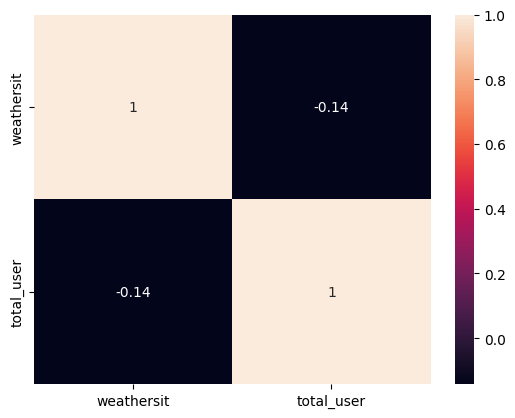

In [51]:
# Melihat korelasi antara total_user dengan cuaca
sns.heatmap(hour_bike_df[["weathersit", "total_user"]].corr(numeric_only=True), annot=True)

plt.show()

### Pertanyaan 3: Apa pengaruh hari libur terhadap penggunaan rental sepeda?

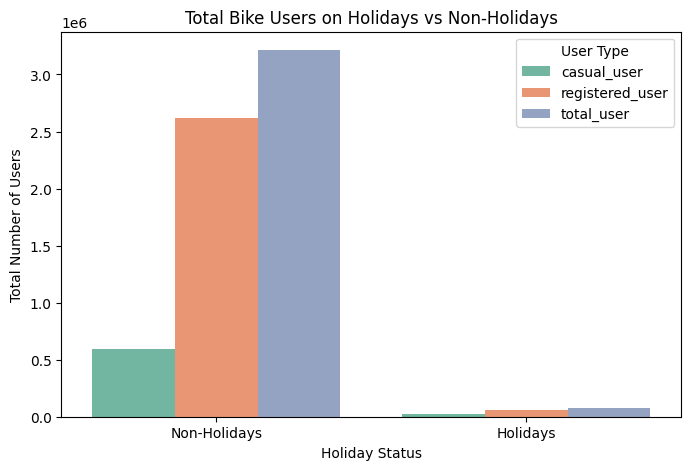

In [52]:
# Mapping holiday to descriptive names
grouped_holiday['holiday_description'] = grouped_holiday['holiday'].map({0: 'Non-Holidays', 1: 'Holidays'})

# Melt the dataframe to long format for Seaborn plotting
grouped_holiday_melted = pd.melt(grouped_holiday, id_vars="holiday_description", value_vars=["casual_user", "registered_user", "total_user"], 
                                 var_name="user_type", value_name="total_users")

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x="holiday_description", y="total_users", hue="user_type", data=grouped_holiday_melted, palette="Set2")

# Set plot titles and labels
plt.title('Total Bike Users on Holidays vs Non-Holidays')
plt.xlabel('Holiday Status')
plt.ylabel('Total Number of Users')
plt.legend(title="User Type")

# Display the plot
plt.show()

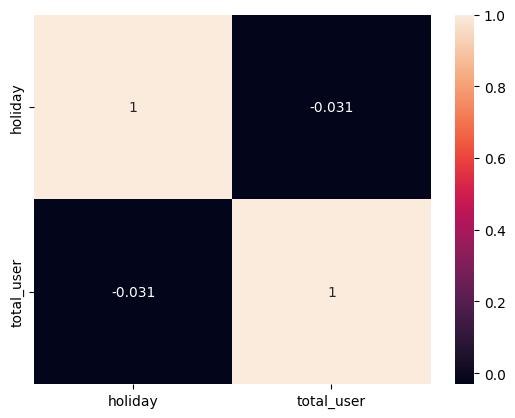

In [53]:
# Melihat korelasi antara total_user dengan cuaca
sns.heatmap(hour_bike_df[["holiday", "total_user"]].corr(numeric_only=True), annot=True)

plt.show()

## Conclusion

- Penyewaan sepeda paling ramai di jam-jam pergi kerja, 7.00-8.00 pagi dan jam pulang kerja, 17.00-18.00 sore
- Hari sibuk bisa terjadi di hari Jumat (based on median)
- Pengguna yang casual/belum teregistrasi cenderung menyewa di akhir pekan, Sabtu/Minggu
- Cuaca berpengaruh pada jumlah penyewa, semakin cerah cuacanya, semakin banyak orang menyewa sepeda. Terlihat dari banyaknya penyewa pada cuaca cerah dan berawan dibandingkan pada ssaat cuaca hujan/bersalju
- Pada hari libur semakin sedikit orang yang akan menyewa sepeda karena orang-orang akan cenderung menikmati hari liburnya daripada bepergian dengan menyewa sepeda

In [54]:
# More readable dataframe for streamlit
readable_bike_df = hour_bike_df
readable_bike_df

,date_day,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual_user,registered_user,total_user
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [55]:
# Ubah value season
readable_bike_df["season"] = readable_bike_df["season"].apply(lambda x: "Spring" if x == 1 else ("Summer" if x == 2 else ("Fall" if x == 3 else "Winter")))

In [56]:
# Ubah value year
readable_bike_df["year"] = readable_bike_df["date_day"].apply(lambda x: x.strftime("%Y"))

In [57]:
# Ubah value month
readable_bike_df["month"] = readable_bike_df["date_day"].apply(lambda x: x.month_name())

In [58]:
# Ubah value holiday
readable_bike_df["holiday"] = readable_bike_df["holiday"].apply(lambda x: "Holiday" if x == 1 else "Not Holiday")

In [59]:
# Ubah value weekday
readable_bike_df["weekday"] = readable_bike_df["date_day"].apply(lambda x: x.day_name())

In [61]:
# Ubah value workingday
readable_bike_df["workingday"] = readable_bike_df["workingday"].apply(lambda x: "Work Day" if x == 1 else "Not Work Day")

In [62]:
# Ubah value weathersit
readable_bike_df["weathersit"] = readable_bike_df["weathersit"].apply(lambda x: "Clear" if x == 1 else ("Cloudy/Mist" if x == 2 else ("Light rain/snow" if x == 3 else "Heavy rain/snow")))

In [67]:
readable_bike_df.to_csv("dashboard/bike_data.csv", index=False)